In [12]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D
import librosa
import seaborn as sns
import sklearn.metrics

In [13]:
dir_path = '/home/duh17/Desktop/free-spoken-digit-dataset/recordings/'
file_names = [f for f in listdir(dir_path) if isfile(join(dir_path, f)) and '.wav' in f]

In [14]:
lst = []
for file_name in file_names :
#     print(file_name)
    sample, sample_rate = librosa.load(dir_path+file_name, sr=8000)
    mfccs = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=24)
    lst.append([mfccs, file_name])

In [15]:
temp = []
for i in range(2000) :
    temp.append(lst[i][0].shape[1])
min_len_of_input = min(temp)
# lst[4][0][:,:3]

In [16]:
def purify(inmfcc, maxlength) :
    """
    :inmfcc : input mfcc and file name
    :rtype: truncated mfcc
    """
    outmfcc = inmfcc[0][:,:3]
    return outmfcc

In [17]:
res = []
N_samples = 2000

for i in lst :
#     print(i)
    res.append([purify(i, min_len_of_input), i[1]])
    

In [18]:
# res

In [19]:
X = []
Y = []
for i in res :
    X.append(i[0])
    Y.append(int(i[1][0]))
X = np.asarray(X)
tempY = np.asarray(Y)

In [20]:
lsttmp = []
for i in tempY :
    tmp = []
    for numbers in range(10) :
        if numbers == i :
            num = 1
        else :
            num = 0
        tmp.append(num)
    lsttmp.append(tmp)


In [21]:
Y = np.asarray(lsttmp)
Y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [22]:
X.resize(2000,24,3,1)
X.shape

(2000, 24, 3, 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
# X_train = X_train.reshape(1340, 8000, 1)

In [38]:
model = Sequential()
# model.add(Conv1D(filters=1, kernel_size=10, activation='relu', input_shape=(8000,)))
model.add(Conv2D(32,(2,2),     
                  input_shape=X_train.shape[1:],      
                  activation= 'relu',
                  padding='same')) 
# model.add(Dense(8000, activation='relu'))
#model.add(Conv2D(32, (2,2), padding='valid'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [39]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [40]:
history = model.fit(X_train,y_train, epochs=100, validation_split=0.2)

Train on 1072 samples, validate on 268 samples
Epoch 1/100
1072/1072 [==============================] - 0s 437us/step - loss: 3.2284 - acc: 0.2071 - val_loss: 1.7862 - val_acc: 0.3582
Epoch 2/100
1072/1072 [==============================] - 0s 115us/step - loss: 1.7511 - acc: 0.3909 - val_loss: 1.7499 - val_acc: 0.3507
Epoch 3/100
1072/1072 [==============================] - 0s 120us/step - loss: 1.4464 - acc: 0.5056 - val_loss: 1.0645 - val_acc: 0.6157
Epoch 4/100
1072/1072 [==============================] - 0s 120us/step - loss: 1.1098 - acc: 0.6278 - val_loss: 0.9668 - val_acc: 0.6194
Epoch 5/100
1072/1072 [==============================] - 0s 122us/step - loss: 0.8672 - acc: 0.6931 - val_loss: 0.6928 - val_acc: 0.7761
Epoch 6/100
1072/1072 [==============================] - 0s 127us/step - loss: 0.7259 - acc: 0.7463 - val_loss: 0.5812 - val_acc: 0.8172
Epoch 7/100
1072/1072 [==============================] - 0s 117us/step - loss: 0.6241 - acc: 0.7761 - val_loss: 0.8242 - val_acc: 0

1072/1072 [==============================] - 0s 129us/step - loss: 0.0746 - acc: 0.9748 - val_loss: 0.2668 - val_acc: 0.9440
Epoch 61/100
1072/1072 [==============================] - 0s 114us/step - loss: 0.1229 - acc: 0.9562 - val_loss: 0.2148 - val_acc: 0.9552
Epoch 62/100
1072/1072 [==============================] - 0s 133us/step - loss: 0.0556 - acc: 0.9841 - val_loss: 0.1979 - val_acc: 0.9664
Epoch 63/100
1072/1072 [==============================] - 0s 118us/step - loss: 0.0775 - acc: 0.9683 - val_loss: 0.2744 - val_acc: 0.9366
Epoch 64/100
1072/1072 [==============================] - 0s 122us/step - loss: 0.0643 - acc: 0.9776 - val_loss: 0.2108 - val_acc: 0.9552
Epoch 65/100
1072/1072 [==============================] - 0s 132us/step - loss: 0.0913 - acc: 0.9748 - val_loss: 0.1786 - val_acc: 0.9552
Epoch 66/100
1072/1072 [==============================] - 0s 119us/step - loss: 0.0562 - acc: 0.9860 - val_loss: 0.2074 - val_acc: 0.9552
Epoch 67/100
1072/1072 [=======================

In [41]:
y_pred = model.predict(X_test)
model.evaluate(X_test, y_test)

660/660 [==============================] - 0s 30us/step


[0.08323432238716068, 0.9712121212121212]

In [ ]:
jktest = res[1024][0]
res[1024][1]

jk_pred = model.predict(jktest.reshape(1,24,3,1))

jk_pred

In [ ]:
Y[1024]

In [42]:
def save_model(model) :
    model.save('MFCC.h5')

In [43]:
save_model(model)

In [29]:
def load_model() :
    model = keras.models.load_model('MFCC.h5')
    return model

In [5]:
model = load_model()

W0306 13:35:19.669106 140417789208064 deprecation.py:506] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [44]:
matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [45]:
matrix

array([[70,  0,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 0, 72,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0, 59,  2,  1,  0,  2,  0,  0,  0],
       [ 1,  0,  0, 53,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 66,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3, 67,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 62,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 73]])

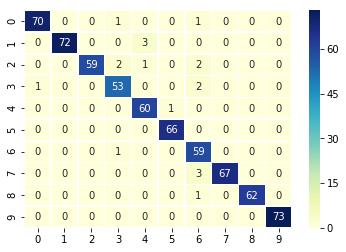

In [46]:
sns.heatmap(matrix, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.savefig("confusion_heatgraph.png", dpi=600)

In [47]:
from keras.utils import plot_model
plot_model(model, to_file='model.svg', show_shapes=True)

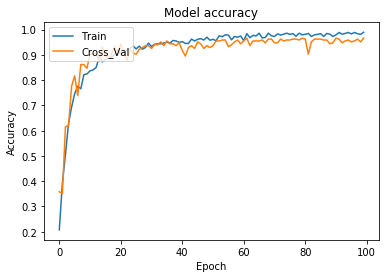

In [54]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross_Val'], loc='upper left')
plt.savefig("accuracy.png", dpi=600)
plt.show()

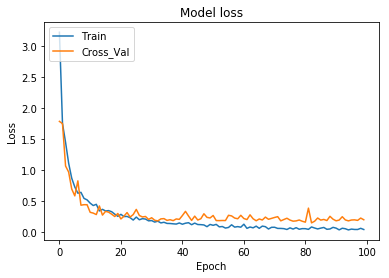

In [55]:
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross_Val'], loc='upper left')
plt.savefig("loss.png", dpi=600)
plt.show()